## Spiral Wave Initiation

### Two cross stimuls (S1S2)

Running AlievPanfilov2D: 100%|██████████| 20000/20000 [00:04<00:00, 4165.71it/s]


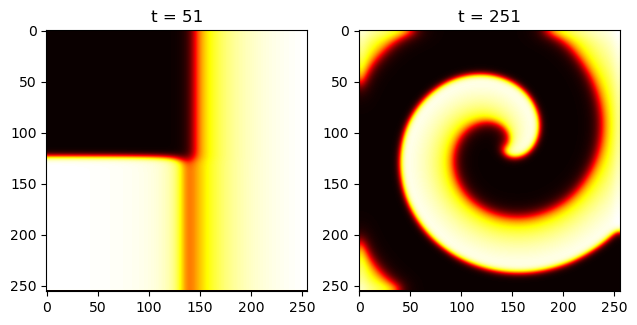

In [28]:

import matplotlib.pyplot as plt

import finitewave as fw

# set up the tissue:
n = 256
tissue = fw.CardiacTissue2D([n, n])


# set up stimulation parameters:
stim_sequence = fw.StimSequence()
stim_sequence.add_stim(fw.StimVoltageCoord2D(time=0, volt_value=1,
                                             x1=0, x2=n, y1=0, y2=5))
stim_sequence.add_stim(fw.StimVoltageCoord2D(time=50, volt_value=1,
                                             x1=n//2, x2=n, y1=0, y2=n))

# create model object:
model = fw.AlievPanfilov2D()
# set up numerical parameters:
model.dt = 0.01
model.dr = 0.3
model.t_max = 51
# add the tissue and the stim parameters to the model object:
model.cardiac_tissue = tissue
model.stim_sequence = stim_sequence

model.run()

u_s2 = model.u.copy()

model.t_max = 200
model.run()

# show the potential map at the end of calculations:
fig, axs = plt.subplots(ncols=2)
axs[0].imshow(u_s2, cmap='hot')
axs[0].set_title("t = 51")
axs[1].imshow(model.u, cmap='hot')
axs[1].set_title("t = 251")
plt.tight_layout()
plt.show()


### Equvidistant Stimulation

Running AlievPanfilov2D: 100%|██████████| 20000/20000 [00:03<00:00, 5586.77it/s]


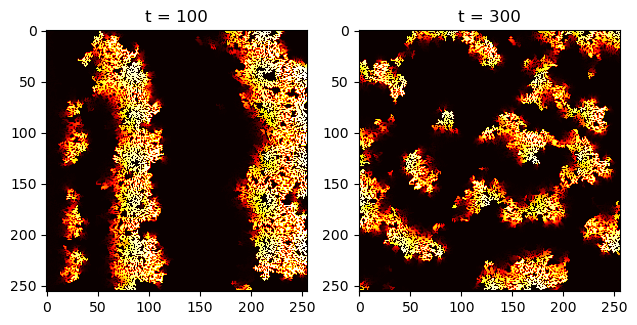

In [ ]:

import matplotlib.pyplot as plt

import finitewave as fw

# set up the tissue:
n = 256
tissue = fw.CardiacTissue2D([n, n])
tissue.add_pattern(fw.Diffuse2DPattern(0.35))

# set up stimulation parameters:
stim_sequence = fw.StimSequence()

# stimulate the tissue at the top border with a time step of 28:
for t in [0, 28, 56, 84]:
    stim_sequence.add_stim(fw.StimVoltageCoord2D(time=t, volt_value=1,
                                                x1=0, x2=n, y1=0, y2=5))

# create model object:
model = fw.AlievPanfilov2D()
# set up numerical parameters:
model.dt = 0.01
model.dr = 0.3
model.t_max = 100
# add the tissue and the stim parameters to the model object:
model.cardiac_tissue = tissue
model.stim_sequence = stim_sequence

model.run()
u_s2 = model.u.copy()

model.t_max = 300
model.run(initialize=False)

# show the potential map at the end of calculations:
fig, axs = plt.subplots(ncols=2)
axs[0].imshow(u_s2, cmap='hot')
axs[0].set_title("t = 100")
axs[1].imshow(model.u, cmap='hot')
axs[1].set_title("t = 300")
plt.tight_layout()
plt.show()


### S1S2 protocol with shorter S2

Running AlievPanfilov2D: 100%|█████████▉| 14000/14001 [00:02<00:00, 5142.52it/s]


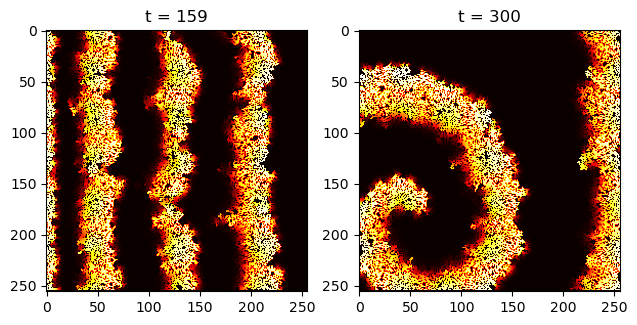

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import finitewave as fw

# set up the tissue:
n = 256
tissue = fw.CardiacTissue2D([n, n])
tissue.add_pattern(fw.Diffuse2DPattern(0.3))

# set up stimulation parameters:
stim_sequence = fw.StimSequence()
# stimulate the tissue with a 2x45 prebeats, 3x30 s1 and 1x23 s2:
prebeats = np.array([0, 45])
s1 = prebeats[-1] + np.array([30, 2 * 30, 3 * 30])
s2 = s1[-1] + np.array([23])
for t in np.concatenate([prebeats, s1, s2]):
    stim_sequence.add_stim(fw.StimVoltageCoord2D(time=t, volt_value=1,
                                                 x1=0, x2=n, y1=0, y2=5))

# create model object:
model = fw.AlievPanfilov2D()
# set up numerical parameters:
model.dt = 0.01
model.dr = 0.3
model.t_max = s2[-1] + 2
# add the tissue and the stim parameters to the model object:
model.cardiac_tissue = tissue
model.stim_sequence = stim_sequence

model.run()
u_s2 = model.u.copy()

model.t_max = 300
model.run(initialize=False)

# show the potential map at the end of calculations:
fig, axs = plt.subplots(ncols=2)
axs[0].imshow(u_s2, cmap='hot')
axs[0].set_title(f"t = {s2[-1] + 1}")
axs[1].imshow(model.u, cmap='hot')
axs[1].set_title("t = 300")
plt.tight_layout()
plt.show()
